# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [23]:
pip install sklearn

Processing c:\users\tdias\appdata\local\pip\cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074\sklearn-0.0-py2.py3-none-any.whl
  Using cached scikit_learn-0.22.1-cp37-cp37m-win_amd64.whl (6.3 MB)
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [77]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [78]:
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

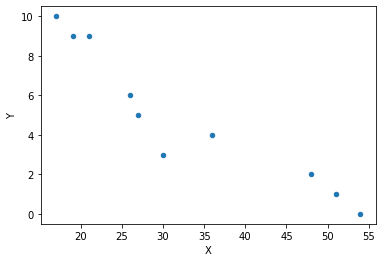

In [79]:
# Your code here.
student_data.plot.scatter('X','Y')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

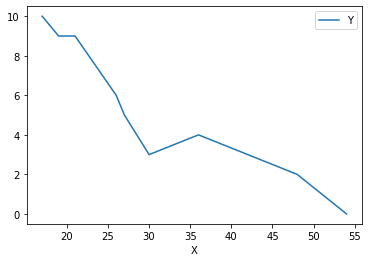

In [40]:
# Your response here.
student_data.sort_values(by='X').plot.line('X','Y')

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [132]:
# Your response here.
#correlation:
cor=student_data.corr()

#covariance:
cov=student_data.cov()

"""
The value of covariance is affected by the change in scale of the variables. If all 
the values of the given variable are multiplied by a constant and all the values of another variable are multiplied, 
by a similar or different constant, then the value of covariance also changes. 
However, on doing the same, the value of correlation is not influenced by the change in scale of the values. 
Another difference between covariance and correlation is the range of values that they can assume. 
While correlation coefficients lie between -1 and +1, covariance can take any value between -∞ and +∞.

In both indicators, covariance and correlation, negative values are an indication that the movement in one variable is 
opposite to the movement of the other variable. So, in this case, for both indicators, when the age increases 
the number of tardies decreases.

The correlation value is -0.93, which means that Age is heavily correlated with the number of Tardies.

Using covariance, we can only gauge the direction of the relationship (whether the variables tend to move 
in tandem or show an inverse relationship). However, it does not indicate the strength of the relationship, 
nor the dependency between the variables.

"""

cor

,X,Y
X,1.00000,0.96523
Y,0.96523,1.00000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

Plot your regression model on your scatter plot.

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

"\nMy outcome variable is a linear function that represents a model for this data. I'm using a linear regression.\n"

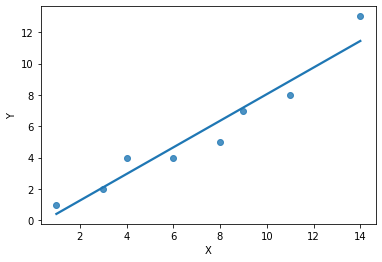

In [108]:
sns.regplot(x="X", y="Y", data=student_data,ci=None)

"""
My outcome variable is a linear function that represents a model for this data. I'm using a linear regression.
"""

In [ ]:
# Your response here. 

"""
Observing the regression model, we clearly can see that the linear function has a negative slope, which one more time
proves that the two variables are related in an opposite direction, i.e, when the age increases, the tardies decrease.
Through my analysis, I'm able to come to the conclusion that age is, in fact, a good predictor of tardiness.


"""


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [51]:
# Import any libraries you may need & the data
data=pd.read_csv('C:/Users/TDias/Documents/GitHub/Lessons/vehicles.csv')
data


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [58]:
# Your response here. 
data=data[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
data.corr()

"""
Since the variable Year has a correlation inferior to 0.5, we can affirm that Year doensn't have a relevant influence on the
outcome. The most important variable to calculate CO2 emissions is Fuel Barrels/Year, with a correlation of 0.9861. Combined MPG
Fuel Cost/Year also have a high correlation with the CO2 emissions, 0.92 and 0.93, respectively.

"""

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [102]:
# Your response here.
X = data[['Fuel Barrels/Year','Combined MPG','Fuel Cost/Year']]
Y = data['CO2 Emission Grams/Mile']

lm = LinearRegression() ## Inicialize the object
model = lm.fit(X,Y)
predictions = lm.predict(X) 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [103]:
# Your response here. 
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_) ## coef is same as slope

res=Y-predictions
RMSE = (sum(res**2)/len(X))**0.5
print (RMSE)


"""
The variable Fuel Barrels/Year is the most important variable for the model, beacuse it is the one with the biggest slope.
On the multiple regression equation, that variable has the highest coefficient and it is the variable that
relates with the outcome the most.

The correlation analysis also revealed that Fuel Barrels/Year was the most relevant variable. Considering just the 
correlation analysis, I could not assume with certainity that this variable was the most related. However, after
developing and analysing the regression model, I can say with confidence that this variable is the one that most relates to 
the CO2 Emissions.

"""

Intercept:  131.67417184227406
Coef:  [19.69545749 -3.166074    0.03166095]
16.753363704216525


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [126]:
# Your code here.
party_data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
party_data


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

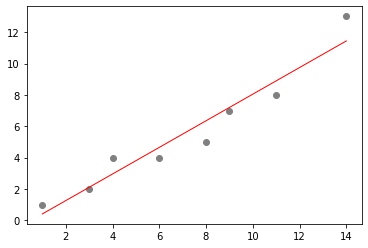

In [127]:
# Your code here.
Y = party_data['Y'].values.reshape(-1,1) 
X = party_data['X'].values.reshape(-1,1)
lm = LinearRegression() 
model = lm.fit(X,Y)
predictions = lm.predict(X)

plt.scatter(X, Y,  color='gray')
plt.plot(X, predictions, color='red', linewidth=1)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [128]:
# Your response here.
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

res=Y-predictions
RMSE = (sum(res**2)/len(X))**0.5
print (RMSE)

"""
I see a linear plot, with a positive slope.It seems like there is a positive influence between this variables. 
When the number of people invited raises, the number of of people that don't show up also raises.

"""

Intercept:  [-0.43939394]
Coef:  [[0.84848485]]
[0.93338744]


"\nI see a linear plot, with a positive slope.It seems like there is a positive influence between this variables. \nWhen the number of people invited raises, the number of of people that don't show up also raises.\n\n"

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [134]:
# Your response here. 
"""
Yes, it seems that when 14 people were invited, an unusual amount of people decided to unattend. Only one guest said yes.
I will construct the new model, without that party.

"""
final_data=party_data.drop([7])




What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

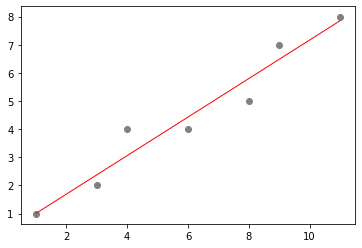

In [135]:
# Your response here.
Y = final_data['Y'].values.reshape(-1,1) 
X = final_data['X'].values.reshape(-1,1)
lm = LinearRegression() 
model = lm.fit(X,Y)
predictions = lm.predict(X)

plt.scatter(X, Y,  color='gray')
plt.plot(X, predictions, color='red', linewidth=1)
plt.show()


In [137]:
print("Intercept: ", lm.intercept_)
print("Coef: ", lm.coef_)

res=Y-predictions
RMSE = (sum(res**2)/len(X))**0.5
print (RMSE)


Intercept:  [0.32330827]
Coef:  [[0.68421053]]
[0.55231181]


In [ ]:
"""
As expected, the RMSE and coefficient of the model without the outlier is inferior to the one with it Which leads me to the conclusion
that the data removed was in fact an outlier and shouldn't be considered on the model.

""""